## Decision Trees and Random Forests

__Data__: LindingClub.com lending data from 2007-2010. 

__Goal__: to classify and predict whether or not the borrower paid back their loan in full.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
# Load data into pandas Dataframe

loans = pd.read_csv('loan_data.csv')

### Exploratory Data Analysis

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


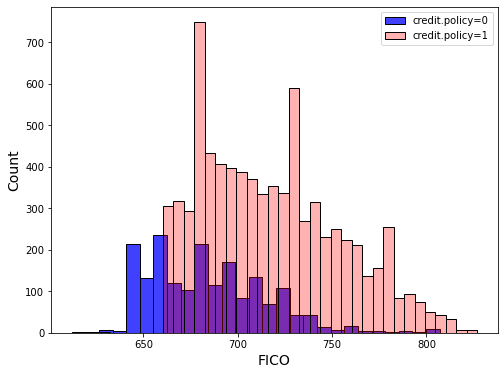

In [62]:
# Count of the fico scores with respect to credit.policy
# "Scores range from 300 to 850, with scores in the 670 to 739 range considered to be “good” credit history."
# Source: https://www.investopedia.com/terms/f/ficoscore.asp

plt.figure(figsize=(8,6))
ax = sns.histplot(data=loans[loans['credit.policy']==0], x='fico', color='b', label='credit.policy=0')
sns.histplot(data=loans[loans['credit.policy']==1], x='fico', color='r', alpha=0.3, label='credit.policy=1')
ax.set_xlabel('FICO',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
plt.legend();

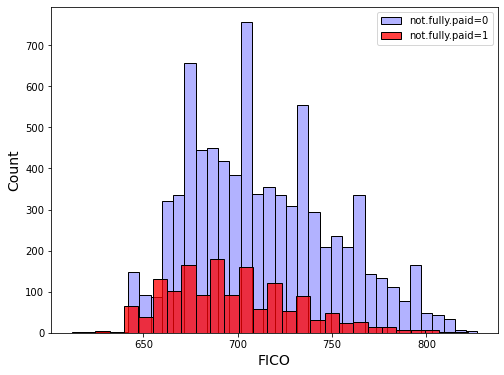

In [61]:
# Count of the fico scores with respect to not.fully.paid

plt.figure(figsize=(8,6))
ax = sns.histplot(data=loans[loans['not.fully.paid']==0], x='fico', color='b', alpha=0.3, label='not.fully.paid=0')
sns.histplot(data=loans[loans['not.fully.paid']==1], x='fico', color='r', label='not.fully.paid=1')
ax.set_xlabel('FICO',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
plt.legend();

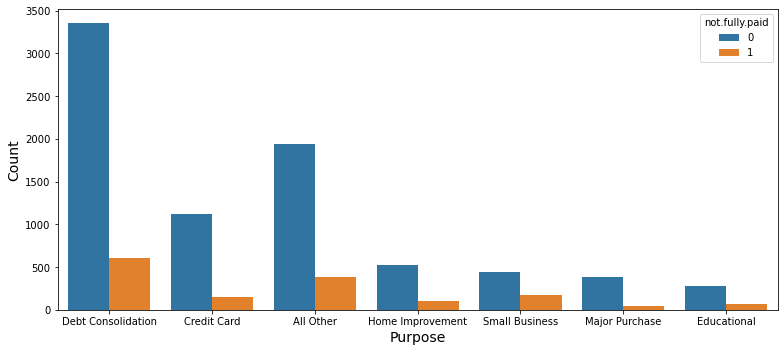

In [58]:
# Countplot of the number of loans per purpose with respect to not.fully.paid

plt.figure(figsize=(11,5))
ax = sns.countplot(x="purpose", hue="not.fully.paid", data=loans)
purpose_list = ['Debt Consolidation', "Credit Card", "All Other", "Home Improvement", 
               "Small Business", "Major Purchase", "Educational"]
ax.set_xticks(range(len(purpose_list)))
ax.set_xticklabels(purpose_list)
ax.set_xlabel('Purpose',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
plt.tight_layout();


Pearson's correlation coefficient: -0.71
p-value: 0.00



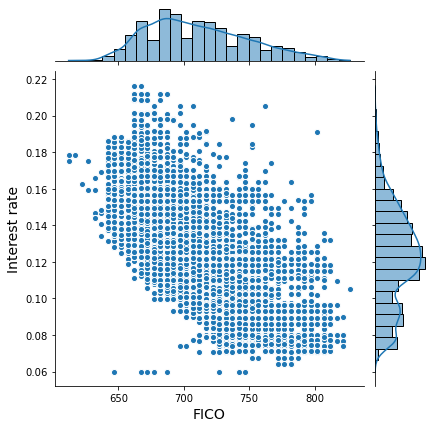

In [9]:
# joinplot for fico score versus the interest rate with Pearson correlation coefficient and p-value
# There appears to be a negative linear relationship between the two predictors. 


import scipy.stats as stats
r, p = stats.pearsonr(loans['fico'], loans['int.rate'])
print("""
Pearson's correlation coefficient: {:.2f}
p-value: {:.2f}
""".format(r, p))
ax = sns.jointplot(x='fico', y='int.rate', data=loans,
             marker=".", s=150, marginal_kws=dict(bins=25, kde=True))
ax.set_axis_labels('FICO', 'Interest rate', fontsize=14);

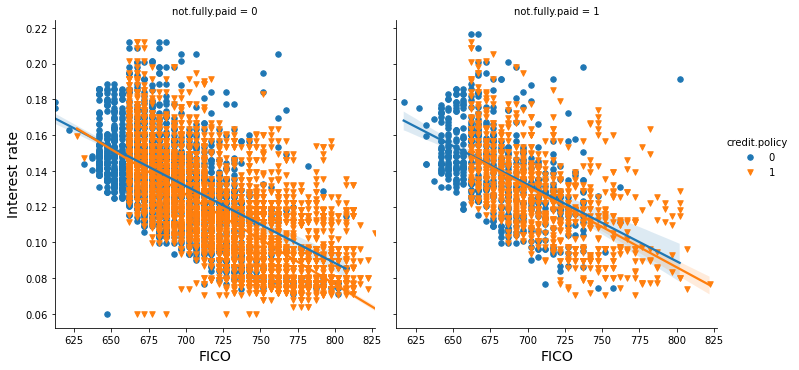

In [64]:
# Double lmplots for fico score versus interest rates with respect to credit.policy for both cases of not.fully.paid
# In the case of not.fully.paid=0, the two trends appear different, i.e. have different slopes. Apparently a credit policy 
# that meets the LendingClub criteria will assure you having lower interest rates if your fico score is in the "good" range. 
# In the case of not.fully.paid=1, the two trends appear similar. There's really no difference between interest rates 
# if you do or don't meet the credit policy criteria.

g = sns.lmplot(x="fico", y="int.rate", col="not.fully.paid", hue='credit.policy', data=loans,
              markers=['o', 'v'], scatter_kws={'s':30, 'alpha':1}, legend=False)
g.set_axis_labels('FICO', 'Interest rate', fontsize=14)
plt.legend(bbox_to_anchor=(1.25,0.65), title='credit.policy', frameon=False);

### Decision Tree Model

In [29]:
# Encode the purpose feature from categorical to binary. We will drop the all_other category.
# From the docs:
# [D]ecision trees are [a]ble to handle both numerical and categorical data. However scikit-learn implementation does not 
# support categorical variables for now."
# Source: https://scikit-learn.org/stable/modules/tree.html#tree

loans_final = pd.get_dummies(loans, columns=['purpose'], drop_first=True)
loans_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

In [21]:
X = loans_final.drop('not.fully.paid',axis=1) # predictors
y = loans_final['not.fully.paid'] # target variable

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dtree = DecisionTreeClassifier(max_depth=None) # decision tree classifier instance
dtree.fit(X_train,y_train) # model fit to the training data

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

In [92]:
predictions = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874



In [81]:
print(confusion_matrix(y_test,predictions))

[[1990  441]
 [ 340  103]]


In [66]:
# Create Random Forest model

from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=600) # random forest classifier instance

# from the docs:
# "A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples 
# of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample 
# size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is 
# used to build each tree."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [42]:
rfc.fit(X_train,y_train) # Build a forest of trees from the training set

RandomForestClassifier(n_estimators=600)

In [43]:
predictions_rfc = rfc.predict(X_test)

In [44]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [45]:
print(confusion_matrix(y_test,predictions_rfc))

[[2425    6]
 [ 434    9]]


__Conclusion__: Overall the averages are better for the random forest model. The precision seems to have improved for class 1 and remains about the same for class 0. The recall however has gotten better for class 0 but worse for class 1. Maybe additional feature engineering is required. 

In [108]:
# Sad attempt at visualizing the depth of the decision tree

feature_names = list(X.columns)
target_names = ['1', '0']

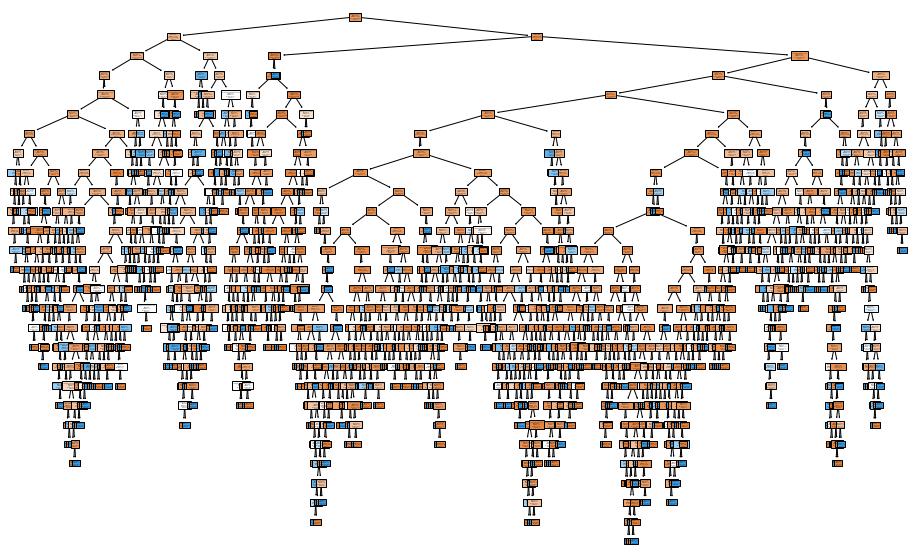

In [109]:
plt.figure(figsize=(16,10))
tree.plot_tree(dtree, 
                feature_names=feature_names,  
                class_names=target_names,
                filled=True);